In [1]:
import json
import pickle
import sklearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
json_path = './vueDos/Sujet'
xsens_path = '../Xsens_dosHz.p'
n = ['11','12','13','15','21']
def load_json(i):
    file_path =json_path+i+'_1d_success.json' 
    with open(file_path , 'rb') as fl:
        data = json.load(fl)
    return data
def pickle_data(i,angleName):
    with open(xsens_path, 'rb') as f:
        xsens_data = pickle.load(f)
    xs = xsens_data['Sujet'+i+'_T1']
    l = xs[angleName].tolist()
    return l
def get_angle(angleName,dict_):
    data = dict_['frames']
    angles = []
    for key,values in data.items():
        angles.append(values['angles'][angleName])
    return angles

#données d'entrainement 
def recup_data(n,angleName):
    datas = []
    data_xsens = []
    for i in n:
        d = load_json(i)
        datas.append(get_angle(angleName,d))
        data_xsens.append(pickle_data(i,angleName))
    datas = sum(datas , [])
    datas = [elmt*-1 for elmt in datas]
    data_xsens = sum(data_xsens,[])
    #dans le cas ou xsens et LEA n'ont pas le même nombre de frame
    if(len(datas) > len(data_xsens)):
        diff = len(datas)-len(data_xsens)
        j = 1
        while j<= diff:
            del datas[len(datas)-1-j]
            j = j+1
    input_ = np.array(datas)
    output_ = np.array(data_xsens)
    return input_,output_
input_,output_ = recup_data(n,'Ft')
#lissage par Savitzky-Golay ou savgol
np.set_printoptions(precision=2)
input_ = savgol_filter(input_, 7, 2, mode='nearest')
input_ = input_.reshape(-1,1)
#input_ ,output_= make_regression(n_features = 1, n_samples=len(input_) ,random_state=1) #return input: ndarray of shape(n_samples,n_fetures)
                                                                                        #        output:ndarray of shape(n_samples)
input_train, input_test, output_train, output_test = train_test_split(input_, output_,test_size=0.2,random_state=1)
regr = MLPRegressor(hidden_layer_sizes=(5,18,20,10,20,18,5,3),solver='lbfgs', max_iter=len(input_train)*10)
score_train= 0
while(score_train<0.86):
    regr = regr.fit(input_train, output_train)
    #output_pred = regr.predict(input_test)
    score_train = regr.score(input_test, output_test)
    print(score_train)

#save model 
filename = 'model_dos.pkl'
pickle.dump(regr, open(filename, 'wb'))
    


-9.32950758181228e-05
0.8630093425621391
0.8620989117100915
-9.329496546772731e-05
0.8618368062554334
0.8633322786226961
0.8618305478570121
-9.329509234379252e-05
-9.329511290179227e-05
0.8621797649324343
0.8623632486422719
-9.329473792729637e-05
0.8624872582994308
0.8620281840850194
0.8627963244711001
0.8625959259521607
-9.329509781141887e-05
0.8626286956006572
0.8632425906027101
-9.329511290179227e-05
0.8633374921337378
0.8622085684248493
-9.329511290179227e-05
0.8624761551273948
-9.329456548812232e-05
-9.329509499811373e-05
0.8620524869360237
-9.331490831687717e-05
-9.329507264999037e-05
0.8533129587053522
0.8608605561995049
0.862363724423362
0.862185071999054
0.8634832363116777
0.8621347052027045
0.8629478441584446
-9.329470195740264e-05
-9.329512602596068e-05
0.8631093559320825
0.8621519376735228
0.8628794863558019
0.8627606921035613
0.8618579037344501
-9.329507054300912e-05
0.8625748062289592
0.8624144496217067
0.8614444815584721
0.8628025431106552
0.8623323455384017
0.8627042377

KeyboardInterrupt: 

les fonctions:
    ***load_json:génère les fichier json contenant les analyses faites par LEA
    ***pickle_data : charge une dictionnaire contenant les anlyses Xsens => echelle de données auxquelles on doit corriger les données de LEA
        paramètres : i==> le numéro du sujet
                     angleName==> le nom de l'angle à corriger pour chaque sujet à chaque frame
    ***recup_data : retourne sous forme de matrice 1D les angles pour chaque frame de LEA et de Xsens
                    n ==> liste des numeros de sujet
                    angleName ==> le nom de l'angle en auestion
    ***get_angle : récupère les angles dans chaque frame du sujet
train_test_split(input_, output_,test_size=0.01,random_state=1): divise les données en données d'entrainnement et données de test, test-size ==> proportion des données de test
regr = MLPRegressor(hidden_layer_sizes=(5,8,10,12,12,5,3),random_state=1,max_iter=len(input_train)).fit(input_train, output_train) : initialise le réseau de neurone à utiliser , avec des couches cachées au nombre de 7
                fit() : entraine le réseau avec ses paramàtres
input_ = savgol_filter(input_, 7, 2, mode='nearest'): éffectue un lissage de données

0.7547382344832259


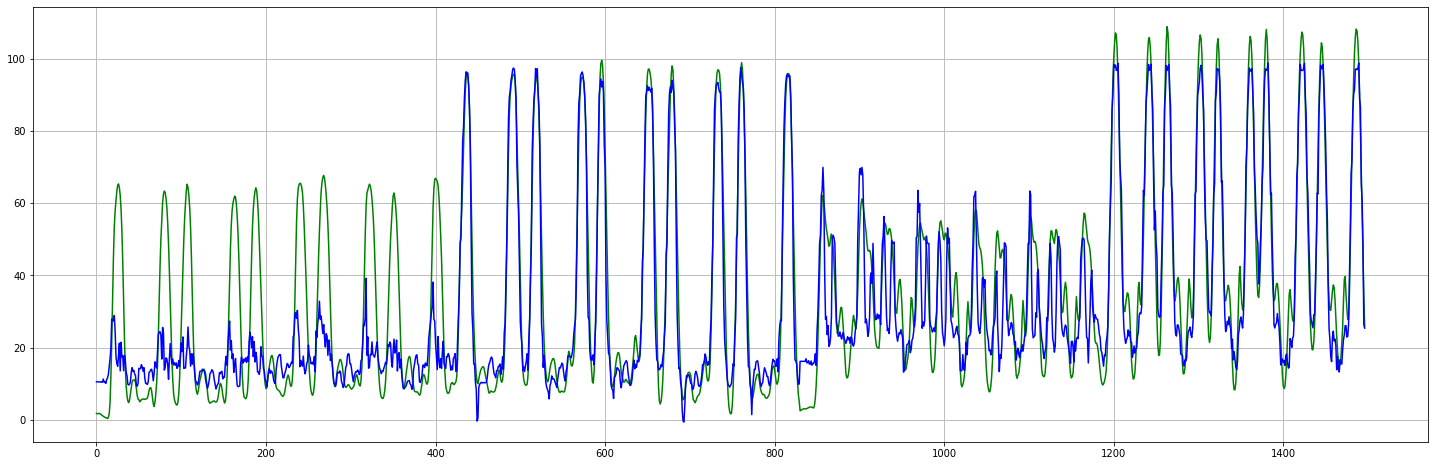

In [4]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
json_path = './vueDos/Sujet'
xsens_path = '../Xsens_dosHz.p'
def load_json(i):
    file_path =json_path+i+'_1d_success.json' 
    with open(file_path , 'rb') as fl:
        data = json.load(fl)
    return data
def pickle_data(i,angleName):
    with open(xsens_path, 'rb') as f:
        xsens_data = pickle.load(f)
    xs = xsens_data['Sujet'+i+'_T1']
    l = xs[angleName].tolist()
    return l
def get_angle(angleName,dict_):
    data = dict_['frames']
    angles = []
    for key,values in data.items():
        angles.append(values['angles'][angleName])
    return angles

#données d'entrainement 
def recup_data(n,angleName):
    datas = []
    data_xsens = []
    for i in n:
        d = load_json(i)
        datas.append(get_angle(angleName,d))
        data_xsens.append(pickle_data(i,angleName))
    datas = sum(datas , [])
    datas = [elmt*-1 for elmt in datas]
    data_xsens = sum(data_xsens,[])
    #dans le cas ou xsens et LEA n'ont pas le même nombre de frame
    if(len(datas) > len(data_xsens)):
        diff = len(datas)-len(data_xsens)
        j = 1
        while j<= diff:
            del datas[len(data_xsens)-1+j]
            j = j+1
    input_ = np.array(datas)
    output_ = np.array(data_xsens)
    return input_,output_

n_test = ['14','22']
X,y = recup_data(n_test,'Ft')

X = X.reshape(-1,1)
#charger le model
filename = 'model_dos.pkl'
model = pickle.load(open(filename, 'rb'))
y_pred = model.predict(X)
score_test = model.score(X, y)
print(score_test)

fig , ax = plt.subplots(nrows=1, figsize=(25, 8))
ax.plot(range(len(y)),y,color = 'green')
ax.plot(range(len(y_pred)),y_pred,color = 'blue')
ax.grid()    
plt.show()
